In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1 - 1 point

Given the following array:

```python
arr = np.arange(100).reshape(10, 10)
```

Write a function that takes an array and a tuple of indices (i, j, k, l) as arguments and returns a subarray for the specified indices. If the values are invalid, the function should return None. Check whether out-of-bound indices cause an error in NumPy.

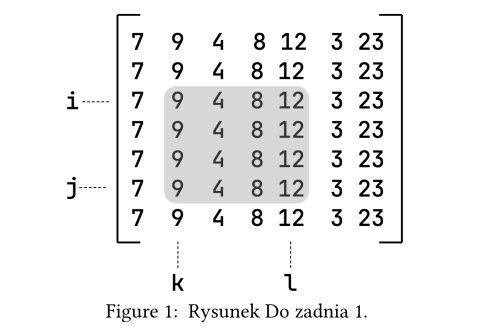


In [2]:
arr = np.arange(100).reshape(10, 10)
print(arr)

def subarray_slice(arr, i, j, k, l):
    if (0 <= i < arr.shape[0] and 0 < j <= arr.shape[0] and
        0 <= k < arr.shape[1] and 0 < l <= arr.shape[1] and
            i < j and k < l):
        return arr[i:j, k:l]
    else:
        return None

invalid_subarray = subarray_slice(arr, 6, 8, 4, 3)
print("Result for invalid indices: ", invalid_subarray)

out_of_bounds_subarray = subarray_slice(arr, 2, 4, 8, 11)
print("Result for out-of-bound indices: ", out_of_bounds_subarray)

valid_subarray = subarray_slice(arr, 2, 4, 5, 8)
print("Result for valid indices: ", valid_subarray)


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
Result for invalid indices:  None
Result for out-of-bound indices:  None
Result for valid indices:  [[25 26 27]
 [35 36 37]]


# Task 2 - 2 points

The following code snippet generates an image representing the "contents" of an `𝑛 × 𝑛` array as a color map:

```python
import numpy as np
import matplotlib.pyplot as plt
array = np.random.rand(50, 50)
plt.imshow(array)
plt.show()
```

Using this code as a reference, write a program that generates a color map reflecting the values of the function:
`𝑓(𝑥, 𝑦) = sin(𝑥) ⋅ cos(𝑦)`
in the interval from −𝜋 to 𝜋. The image should have a resolution of 100 × 100 pixels.


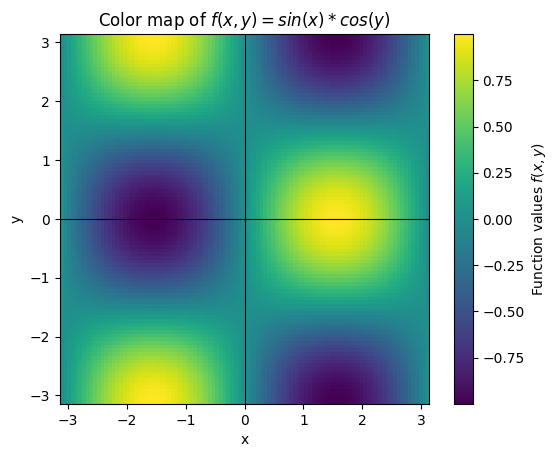

In [3]:
# Define the grid points
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)

# Create the coordinate grid
# https://numpy.org/doc/2.1/reference/generated/numpy.meshgrid.html#numpy-meshgrid
X, Y = np.meshgrid(x, y)

# Compute the function values
array = np.sin(X) * np.cos(Y)

# Plot the color map
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(array, extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.colorbar(label='Function values $f(x, y)$')
plt.title('Color map of $f(x, y) = sin(x) * cos(y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.show()


# Task 3 - 3 points

The following code generates an array of points scored by students (rows) in a test consisting of 10 tasks.

```python
import numpy as np
results = np.random.randint(0, 10, 100).reshape(10, 10)
```

The maximum possible score for a student was 100. Write a function that takes the results array and returns a column of grades that the students achieved.
The grading scale is as follows:
0 - 39: 1.0
40 - 49: 1.5
50 - 55: 2.0
55 - 59: 2.5
60 - 69: 3.0
70 - 74: 3.5
75 - 79: 4.0
80 - 89: 4.5
90 - 100: 5.0
Compute a vector containing the average points that students scored for each task (does not need to be returned by the function).


In [4]:
results = np.random.randint(0, 10, 100).reshape(10, 10)

def calculate_grades(results):
    total_points = results.sum(axis=1)
    print(total_points)

    conditions = [
        (total_points < 40),
        (total_points >= 40) & (total_points <= 49),
        (total_points >= 50) & (total_points <= 55),
        (total_points >= 56) & (total_points <= 59),
        (total_points >= 60) & (total_points <= 69),
        (total_points >= 70) & (total_points <= 74),
        (total_points >= 75) & (total_points <= 79),
        (total_points >= 80) & (total_points <= 89),
        (total_points >= 90)
    ]
    grades = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

    grade_column = np.select(conditions, grades)

    return grade_column

grade_column = calculate_grades(results).reshape(-1, 1)
average_points = results.mean(axis=0)

print("Results array (points per task): \n", results)
print("Student grades: ", grade_column)
print("Average points per task: ", average_points)


[25 55 60 46 22 62 48 45 49 42]
Results array (points per task): 
 [[1 2 3 0 4 2 5 2 1 5]
 [4 6 6 9 2 7 5 7 6 3]
 [8 6 3 4 9 8 6 9 4 3]
 [4 7 5 4 5 2 9 2 2 6]
 [0 0 7 1 3 0 5 0 6 0]
 [4 7 9 9 7 7 4 2 5 8]
 [7 9 3 3 0 6 7 7 0 6]
 [8 4 1 9 1 1 4 4 4 9]
 [7 9 1 5 4 4 3 5 3 8]
 [3 8 7 8 0 3 6 0 7 0]]
Student grades:  [[1. ]
 [2. ]
 [3. ]
 [1.5]
 [1. ]
 [3. ]
 [1.5]
 [1.5]
 [1.5]
 [1.5]]
Average points per task:  [4.6 5.8 4.5 5.2 3.5 4.  5.4 3.8 3.8 4.8]


# Task 4 - 4 points

Write a function that solves a system of linear equations:


\begin{aligned}
a_{1,1}x_1 + a_{1,2}x_2 + \dots + a_{1,n}x_n &= c_1, \\
a_{2,1}x_1 + a_{2,2}x_2 + \dots + a_{2,n}x_n &= c_2, \\
&\vdots \\
a_{n,1}x_1 + a_{n,2}x_2 + \dots + a_{n,n}x_n &= c_n.
\end{aligned}


The function takes as an argument a coefficient matrix of the form:


\begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n} & b_1 \\
a_{2,1} & a_{2,2} & \dots & a_{2,n} & b_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
a_{n,1} & a_{n,2} & \dots & a_{n,n} & b_n
\end{bmatrix}


The function returns:

- **A column array with solutions** for a system with a unique solution,
- The value `None` for an undetermined system,
- **An empty array** for a contradictory system.

You may use the function `np.linalg.det()`, which calculates the determinant of a square matrix.


In [5]:
def solve_linear_system(coeff_matrix):
    """
    Solves a system of linear equations.

    Parameters:
    A two-dimensional matrix where the last column contains the constants, and the remaining columns are the coefficients of the variables.

    Returns:
    - A column array with solutions for a system with a unique solution,
    - None for an undetermined system,
    - An empty array for a contradictory system.
    """
    # Separate the coefficients of variables and the constants
    coefficients = coeff_matrix[:, :-1]
    constants = coeff_matrix[:, -1]

    # Calculate the determinant of the coefficient matrix
    determinant = np.linalg.det(coefficients)

    if determinant == 0:
        # Singular matrix, check rank using SVD (Singular Value Decomposition)
        extended_matrix_rank = np.linalg.matrix_rank(coeff_matrix)
        coefficient_matrix_rank = np.linalg.matrix_rank(coefficients)

        if extended_matrix_rank == coefficient_matrix_rank:
            return None  # Undetermined system
        else:
            return np.array([])  # Contradictory system
    else:
        # Unique solution - calculate the solution
        solutions = np.linalg.solve(coefficients, constants)
        return solutions.reshape(-1, 1)

# Example usage
coeff_matrix = np.array([
    [1, 2, 3, 6],
    [2, 4, 6, 12],
    [1, 1, 1, 3]
])

solution = solve_linear_system(coeff_matrix)
print("Solution: \n", solution)


Solution: 
 None


# Task 5 - 5 points
Using the information from Task 2, write a program that generates an image representing the Mandelbrot set. The grid of points should cover the ranges:
- From −2 to 1 on the `x` axis
- From −1.5 to 1.5 on the `y` axis
with a density of 0.01.


In [ ]:
def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iterations):
    # Define the grid of points
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    # Create a meshgrid of coordinates
    X, Y = np.meshgrid(x, y)
    # Complex numbers
    C = X + 1j * Y  

    # Initialize the matrix for the Mandelbrot set
    Z = np.zeros_like(C, dtype=complex) 
    mandelbrot = np.zeros(C.shape, dtype=int)

    for n in range(max_iterations):
        # Mask points that have not escaped to infinity
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask] ** 2 + C[mask]
        mandelbrot[mask] = n 

    return mandelbrot

def plot_mandelbrot_set(mandelbrot, x_min, x_max, y_min, y_max):
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot, extent=(x_min, x_max, y_min, y_max), cmap="hot")
    plt.colorbar(label="Number of iterations to escape")
    plt.title("Mandelbrot Set")
    plt.xlabel("Real part")
    plt.ylabel("Imaginary part")
    plt.show()

width = 800
height = 800
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iterations = 100

mandelbrot = mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iterations)
plot_mandelbrot_set(mandelbrot, x_min, x_max, y_min, y_max)
